## Predicting Price Properties with Time Series
Predictive model to predict property prices using irregular time series data, where the target variable is the property price.

In [1]:
# Imports

import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
data = pd.read_csv('dataset.csv')

In [3]:
data.head()

,data_venda,preco,tipo_imovel,numero_quartos
0,2011-02-07 0:00,525000,casa,4
1,2011-02-27 0:00,290000,casa,3
2,2011-03-07 0:00,328000,casa,3
3,2011-03-09 0:00,380000,casa,4
4,2011-03-21 0:00,310000,casa,3


In [4]:
data.tail()

,data_venda,preco,tipo_imovel,numero_quartos
32435,2024-07-25 0:00,500000,apartamento,3
32436,2024-07-25 0:00,560000,apartamento,2
32437,2024-07-26 0:00,464950,apartamento,2
32438,2024-07-26 0:00,589000,apartamento,2
32439,2024-07-26 0:00,575000,apartamento,2


In [5]:
data.dtypes

data_venda        object
preco              int64
tipo_imovel       object
numero_quartos     int64
dtype: object

In [ ]:
data['tipo_imovel'].unique()

In [7]:
data.index = pd.to_datetime(data.data_venda)

In [8]:
data = data.drop(columns=['data_venda'])

In [9]:
data.head()

,preco,tipo_imovel,numero_quartos
data_venda,,,
2011-02-07,525000,casa,4
2011-02-27,290000,casa,3
2011-03-07,328000,casa,3
2011-03-09,380000,casa,4
2011-03-21,310000,casa,3


In [10]:
data.tail()

,preco,tipo_imovel,numero_quartos
data_venda,,,
2024-07-25,500000,apartamento,3
2024-07-25,560000,apartamento,2
2024-07-26,464950,apartamento,2
2024-07-26,589000,apartamento,2
2024-07-26,575000,apartamento,2


In [ ]:
# Teste Estacionariedade
# Teste Dickey-Fuller para coluna numero de quartos
print(f"Valor-p da Coluna de Número de Quartos: {adfuller(data['numero_quartos'])[1]}")

Valor-p da Coluna de Número de Quartos: 0.004608572562965618


In [12]:
# Teste Dickey-Fuller para coluna de precos
print(f"Valor-p da Coluna de Preço: {adfuller(data['preco'])[1]}")

Valor-p da Coluna de Preço: 4.7633849315043015e-18


As duas colunas apresentam valor-p menor que 0,05 indicando que são estacionárias.

In [13]:
# Exploração
data.columns

Index(['preco', 'tipo_imovel', 'numero_quartos'], dtype='object')

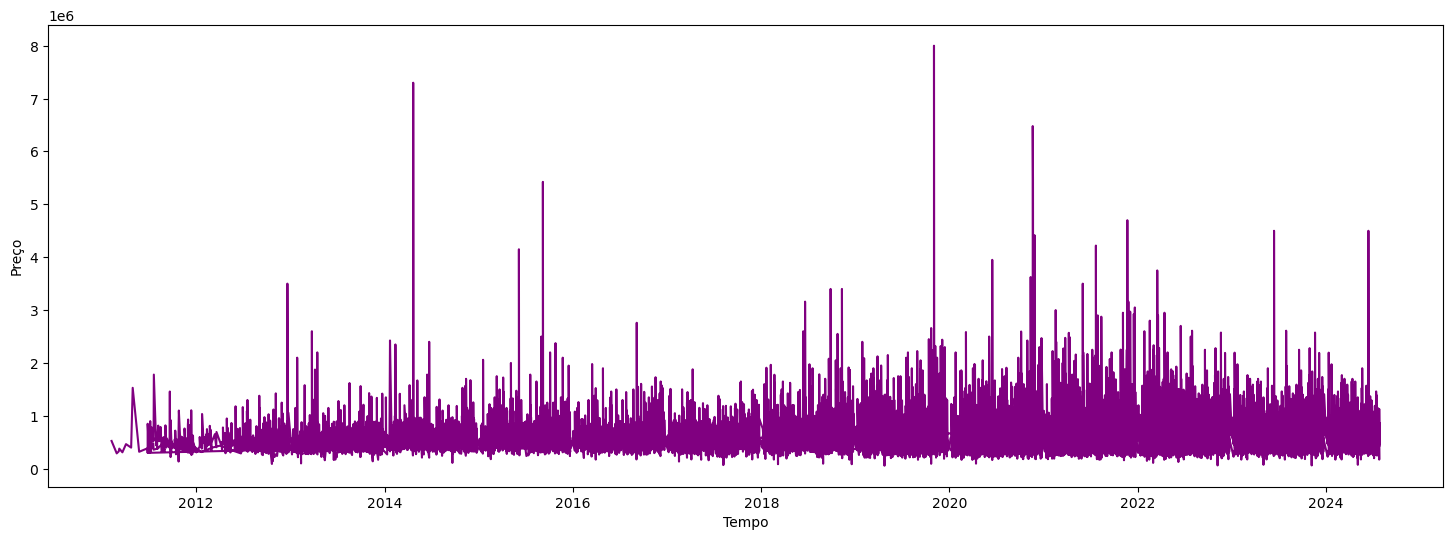

In [14]:
# Visualizando a série temporal de preço com todos os dados
plt.figure(figsize = (18,6))
plt.plot(data['preco'], color = 'purple')
plt.xlabel('Tempo')
plt.ylabel('Preço')
plt.show()

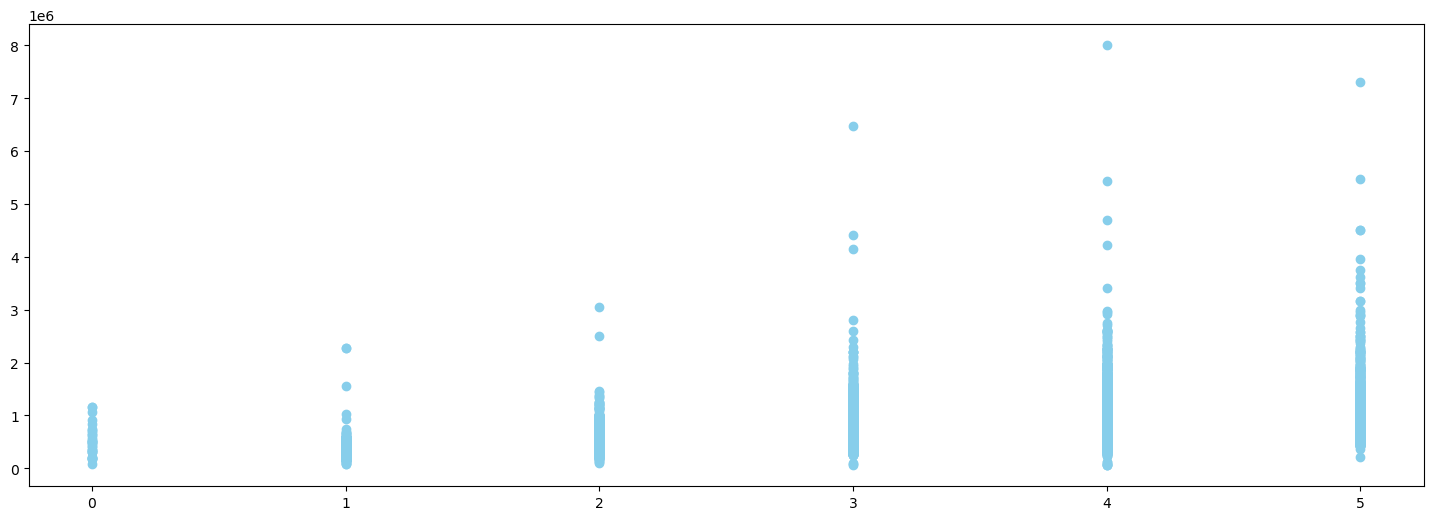

In [15]:
# Scatter Plot entre as variáveis de preço e número de quartos
plt.figure(figsize = (18,6))
plt.scatter(data['numero_quartos'], data['preco'], color = 'skyblue')
plt.show()

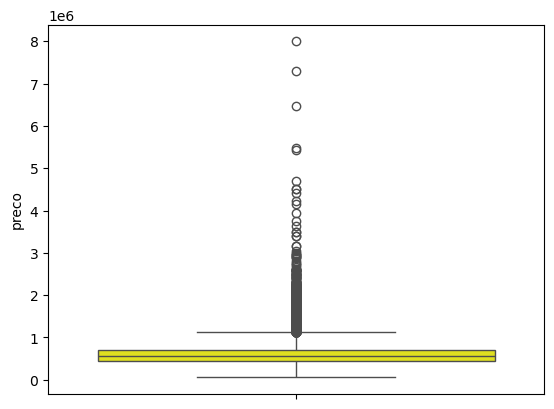

In [17]:
# Boxplot da variável de preço
sns.boxplot(data['preco'], color = 'yellow')
plt.show()

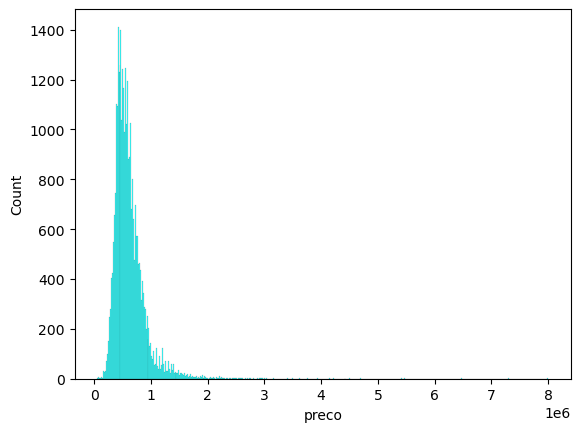

In [18]:
# Histograma da variável de preço
sns.histplot(data['preco'], color = 'cyan')
plt.show()

Os gráficos Boxplo e Histograma indicam forte assimetria á direita.

In [20]:
data.columns

Index(['preco', 'tipo_imovel', 'numero_quartos'], dtype='object')

In [21]:
# Transformação de Log
data['preco'] = np.log(data['preco'])

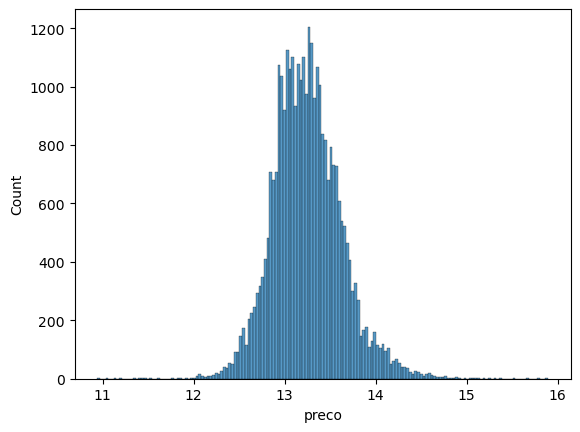

In [22]:
# Histograma
sns.histplot(data['preco'])
plt.show()


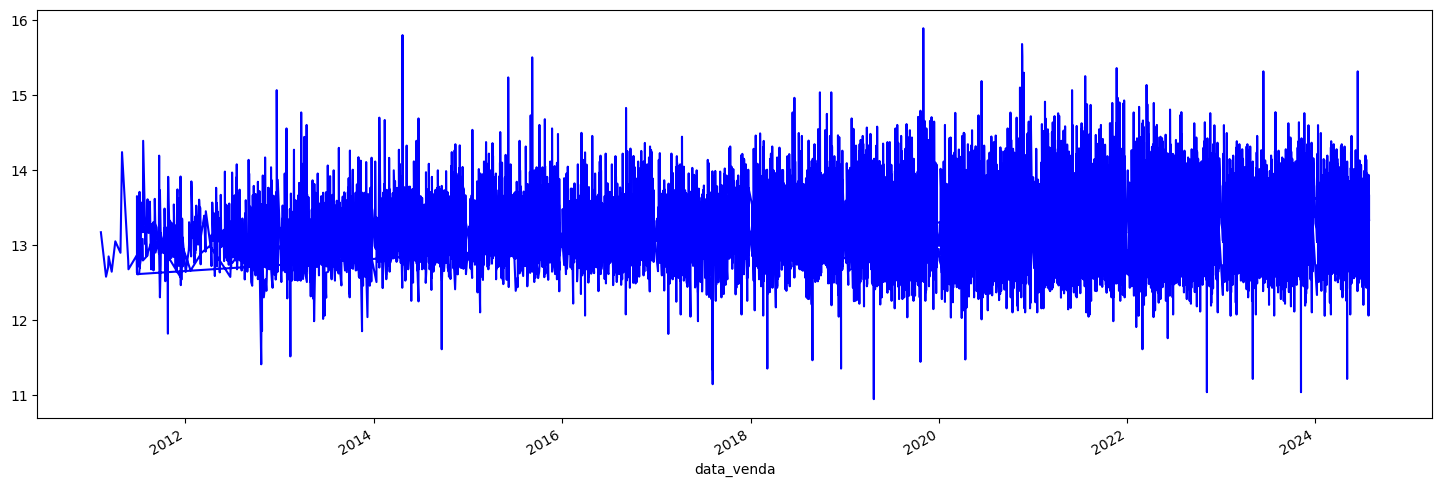

In [23]:
# Plot da variável
data.preco.plot(figsize = (18,6), color = 'blue')
plt.show()

In [24]:
# Transformação da serie irregular em regular, utilizando dados médios mensais.
# Aplicando o enconding na variável categórica para convertê-la em numérica
data['tipo_imovel'] = LabelEncoder().fit_transform(data['tipo_imovel'])

In [25]:
data.head()

,preco,tipo_imovel,numero_quartos
data_venda,,,
2011-02-07,13.171154,1,4
2011-02-27,12.577636,1,3
2011-03-07,12.700769,1,3
2011-03-09,12.847927,1,4
2011-03-21,12.644328,1,3


In [27]:
# Reamostrando a série para que seja mensal
data = data.resample('ME').mean()

In [28]:
data.head(10)

,preco,tipo_imovel,numero_quartos
data_venda,,,
2011-02-28,12.874395,1.000000,3.500000
2011-03-31,12.731008,1.000000,3.333333
2011-04-30,13.395763,1.000000,3.666667
2011-05-31,12.733577,1.000000,3.000000
2011-06-30,13.076171,0.833333,3.333333
2011-07-31,13.195712,0.842105,3.263158
2011-08-31,13.092396,0.913043,3.391304
2011-09-30,13.154373,0.700000,3.300000
2011-10-31,13.037159,0.900000,3.300000


In [29]:
data.tail(10)

,preco,tipo_imovel,numero_quartos
data_venda,,,
2023-10-31,13.316378,0.738676,3.118467
2023-11-30,13.307367,0.749216,3.112853
2023-12-31,13.340488,0.767123,3.127854
2024-01-31,13.226898,0.700730,3.000000
2024-02-29,13.271742,0.710784,3.009804
2024-03-31,13.311664,0.750000,3.161017
2024-04-30,13.314660,0.740566,3.179245
2024-05-31,13.303070,0.763636,3.190909
2024-06-30,13.371549,0.769841,3.396825


In [30]:
# A variável tipo de imóvel não pode ser agrupada adequadamente por mês. Vamos removê-la.
data.drop('tipo_imovel', axis = 1, inplace = True)

In [ ]:
data.head()

,preco,numero_quartos
data_venda,,
2011-02-28,12.874395,3.500000
2011-03-31,12.731008,3.333333
2011-04-30,13.395763,3.666667
2011-05-31,12.733577,3.000000
2011-06-30,13.076171,3.333333
2011-07-31,13.195712,3.263158
2011-08-31,13.092396,3.391304
2011-09-30,13.154373,3.300000
2011-10-31,13.037159,3.300000


In [32]:
# Ajuste do valor da variável numero_quartos arredondando para uma casa decimal
for i in range (len(data['numero_quartos'])):
    data['numero_quartos'][i] = np.round(data['numero_quartos'][i])

In [33]:
data = data.dropna()

In [34]:
data.head()

,preco,numero_quartos
data_venda,,
2011-02-28,12.874395,4.0
2011-03-31,12.731008,3.0
2011-04-30,13.395763,4.0
2011-05-31,12.733577,3.0
2011-06-30,13.076171,3.0


In [35]:
data.tail()

,preco,numero_quartos
data_venda,,
2024-03-31,13.311664,3.0
2024-04-30,13.314660,3.0
2024-05-31,13.303070,3.0
2024-06-30,13.371549,3.0
2024-07-31,13.217123,3.0


In [36]:
# Decomposição da série temporal
result = seasonal_decompose(data['preco'])

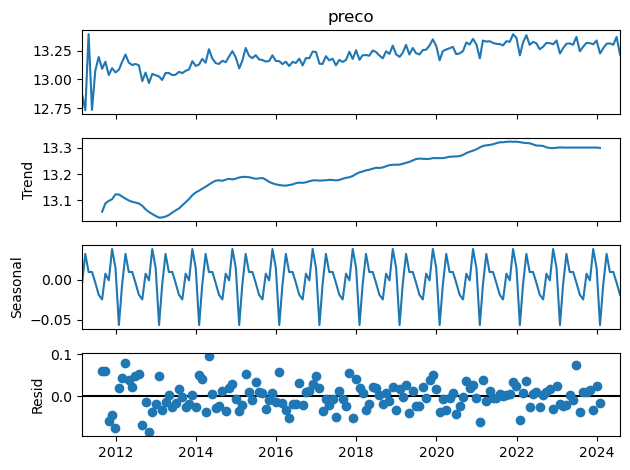

In [38]:
result.plot();

Tendencia em alta, e sazonalidade.

In [39]:
# Engenharia de atributos
data.head()

,preco,numero_quartos
data_venda,,
2011-02-28,12.874395,4.0
2011-03-31,12.731008,3.0
2011-04-30,13.395763,4.0
2011-05-31,12.733577,3.0
2011-06-30,13.076171,3.0


In [40]:
# Extrai o ano e o mês
data['ano'] = data.index.year
data['mes'] = data.index.month

In [41]:
data.head()

,preco,numero_quartos,ano,mes
data_venda,,,,
2011-02-28,12.874395,4.0,2011,2
2011-03-31,12.731008,3.0,2011,3
2011-04-30,13.395763,4.0,2011,4
2011-05-31,12.733577,3.0,2011,5
2011-06-30,13.076171,3.0,2011,6


In [42]:
# Dividindo dados em treino e teste
indice = int(len(data)*.8)

In [43]:
print(len(data), indice)

162 129


In [44]:
# Dados de treino (mantendo a sequência)
dados_treino = data.iloc[:indice]

In [45]:
dados_treino.head(1)

,preco,numero_quartos,ano,mes
data_venda,,,,
2011-02-28,12.874395,4.0,2011,2


In [46]:
dados_treino.tail(1)

,preco,numero_quartos,ano,mes
data_venda,,,,
2021-10-31,13.328343,3.0,2021,10


In [60]:
dados_teste = data.iloc[indice:]

In [61]:
dados_teste.head(1)

,preco,numero_quartos,ano,mes
data_venda,,,,
2021-11-30,13.394882,3.0,2021,11


In [62]:
dados_teste.tail(1)

,preco,numero_quartos,ano,mes
data_venda,,,,
2024-07-31,13.217123,3.0,2024,7


In [47]:
# Dados de entrada são os atributos
dados_entrada_treino = dados_treino.drop(columns=['preco'])

In [48]:
dados_entrada_treino.head()

,numero_quartos,ano,mes
data_venda,,,
2011-02-28,4.0,2011,2
2011-03-31,3.0,2011,3
2011-04-30,4.0,2011,4
2011-05-31,3.0,2011,5
2011-06-30,3.0,2011,6


In [51]:
dados_saida_treino = dados_treino[['preco']]

In [52]:
dados_saida_treino.head()

,preco
data_venda,
2011-02-28,12.874395
2011-03-31,12.731008
2011-04-30,13.395763
2011-05-31,12.733577
2011-06-30,13.076171


In [53]:
# Iniciando o StandardScaler
scaler = StandardScaler()

In [54]:
dados_entrada_treino_scaled = scaler.fit_transform(dados_entrada_treino)

In [55]:
type(dados_entrada_treino_scaled)

numpy.ndarray

In [56]:
# Transformar o resultado de volta em um DataFrame
dados_entrada_treino_scaled = pd.DataFrame(dados_entrada_treino_scaled, columns=dados_entrada_treino.columns)

In [57]:
type(dados_entrada_treino_scaled)

pandas.core.frame.DataFrame

In [58]:
# Modelagem
model = LinearRegression()

In [59]:
model.fit(dados_entrada_treino_scaled, dados_saida_treino)

LinearRegression()

In [64]:
# Entrada e saída de teste
dados_entrada_teste = dados_teste.drop(columns=['preco'])
dados_saida_teste = dados_teste[['preco']]

In [65]:
# Padroniza os dados de teste de entrada
dados_entrada_teste_scaled = scaler.transform(dados_entrada_teste)

In [66]:
# Converte a saída da padronização em dataframe do Pandas
dados_entrada_teste_scaled = pd.DataFrame(dados_entrada_teste_scaled, columns=dados_entrada_treino.columns)

In [67]:
# Previsões
previsoes = model.predict(dados_entrada_teste_scaled)

In [68]:
print(mean_absolute_error(dados_saida_teste, previsoes))

0.05771747846143917


In [69]:
# Desfaza a transformação de log das previsões
previsoes = np.exp(previsoes)

In [71]:
dados_saida_teste = np.exp(dados_saida_teste)

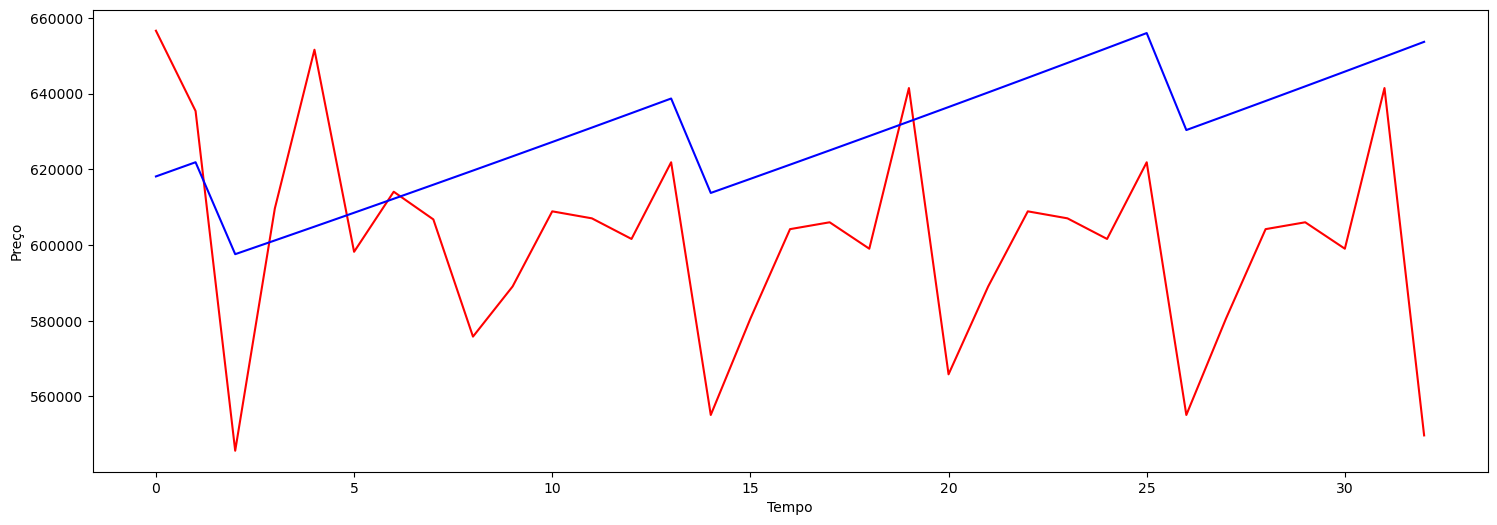

In [72]:
# Plot
plt.figure(figsize = (18,6))
plt.plot(np.array(dados_saida_teste), color = 'red')
plt.plot(np.array(previsoes), color = 'blue')
plt.xlabel('Tempo')
plt.ylabel('Preço')
plt.show()

In [73]:
# Salva em disco
filename = 'modelo.sav'
joblib.dump(model, filename)

['modelo.sav']

In [74]:
# Forecast com o Modelo Treinado
dados_entrada_teste.tail(1)

,numero_quartos,ano,mes
data_venda,,,
2024-07-31,3.0,2024,7


In [75]:
dados_saida_teste.tail(1)

,preco
data_venda,
2024-07-31,549697.027067


In [76]:
# Novos dados para a previsão
novos_dados = {
    "numero_quartos": [4.0],
    "ano": [2024],
    "mes": [8]
    
}

In [77]:
# Converte em DataFrame
data_novos_dados = pd.DataFrame(novos_dados)

In [78]:
# Ajustar e transformar os dados (padronizar)
data_novos_dados_scaled = scaler.transform(data_novos_dados)

In [79]:
data_index = pd.to_datetime('2024-08-31')

In [80]:
# Organiza o dataframe com o indice
data_novos_dados = pd.DataFrame(data_novos_dados_scaled, index=[data_index])

In [81]:
# Carrega o modelo do disco
model_final = joblib.load(filename)

In [82]:
previsao_preco = model_final.predict(data_novos_dados)

In [83]:
previsao_preco

array([[13.49768336]])

In [84]:
# Desfaz a transformação de log
previsao_preco = np.exp(previsao_preco)

In [85]:
previsao_preco

array([[727728.53138214]])

In [86]:
# Acessando o valor e formatando a string
arr = previsao_preco
valor = arr[0][0]  # Acessa o valor no array
print(f"Este é o preço previsto do imóvel: {valor:.2f}")

Este é o preço previsto do imóvel: 727728.53
